In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
data = pd.read_csv('iphone_purchase_records.csv')

In [4]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [49]:
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [53]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:, 3].values

In [6]:
#converting gender to number
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Decision Tree

In [8]:
dt = DecisionTreeClassifier(random_state=42)

In [9]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred_dt = dt.predict(X_test)

In [11]:
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [12]:
f1_score_dt = metrics.f1_score(y_test,y_pred_dt,average='macro')
print('F1 score: {0:f}'.format (f1_score_dt))
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
sdt = precision_score(y_test, y_pred_dt, average='macro')
print('precision score: {0:f}'.format (sdt))
s_dt = recall_score(y_test,y_pred_dt, average='macro')
print('recall score: {0:f}'.format (s_dt))
score_dt = metrics.accuracy_score(y_test,dt.predict(X_test))
print('Accuracy:{0:f}'.format(score_dt))

F1 score: 0.909543
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100

[[63  5]
 [ 3 29]]
precision score: 0.903743
recall score: 0.916360
Accuracy:0.920000


# Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, min_samples_leaf=30)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=30, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [15]:
y_pred_rf = rf.predict(X_test)

In [16]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [17]:
f1_score_rf = metrics.f1_score(y_test,y_pred_rf,average='macro')
print('F1 score: {0:f}'.format (f1_score_rf))
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
srf = precision_score(y_test, y_pred_rf, average='macro')
print('precision score: {0:f}'.format (srf))
s_rf = recall_score(y_test,y_pred_rf, average='macro')
print('recall score: {0:f}'.format (s_rf))
score_rf = metrics.accuracy_score(y_test,rf.predict(X_test))
print('Accuracy:{0:f}'.format(score_rf))

F1 score: 0.932157
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

[[64  4]
 [ 2 30]]
precision score: 0.926025
recall score: 0.939338
Accuracy:0.940000


# Logistic regression

In [18]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
lr = LogisticRegression(random_state=0, solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
y_pred_lr = lr.predict(X_test)

In [21]:
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
f1_score_lr = metrics.f1_score(y_test,y_pred_lr,average='macro')
print('F1 score: {0:f}'.format (f1_score_lr))
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
slr = precision_score(y_test, y_pred_lr, average='macro')
print('precision score: {0:f}'.format (slr))
s_lr = recall_score(y_test,y_pred_lr, average='macro')
print('recall score: {0:f}'.format (s_lr))
score_lr = metrics.accuracy_score(y_test,lr.predict(X_test))
print('Accuracy:{0:f}'.format(score_lr))

F1 score: 0.893855
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

[[65  3]
 [ 6 26]]
precision score: 0.906022
recall score: 0.884191
Accuracy:0.910000


# Naive Bayes

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred_nb = nb.predict(X_test)

In [25]:
y_pred_nb

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [26]:
f1_score_nb = metrics.f1_score(y_test,y_pred_nb,average='macro')
print('F1 score: {0:f}'.format (f1_score_nb))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
snb = precision_score(y_test, y_pred_nb, average='macro')
print('precision score: {0:f}'.format (snb))
s_nb = recall_score(y_test,y_pred_nb, average='macro')
print('recall score: {0:f}'.format (s_nb))
score_nb = metrics.accuracy_score(y_test,nb.predict(X_test))
print('Accuracy:{0:f}'.format(score_nb))

F1 score: 0.891814
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        68
           1       0.93      0.78      0.85        32

    accuracy                           0.91       100
   macro avg       0.92      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

[[66  2]
 [ 7 25]]
precision score: 0.915018
recall score: 0.875919
Accuracy:0.910000


# Stochastic Gradient Descent

In [27]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)

In [28]:
sgd.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=42)

In [29]:
y_pred_sgd = sgd.predict(X_test)

In [30]:
y_pred_sgd

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
f1_score_sgd = metrics.f1_score(y_test,y_pred_sgd,average='macro')
print('F1 score: {0:f}'.format (f1_score_sgd))
print(classification_report(y_test,y_pred_sgd))
print(confusion_matrix(y_test,y_pred_sgd))
ssgd = precision_score(y_test, y_pred_sgd, average='macro')
print('precision score: {0:f}'.format (ssgd))
s_sgd = recall_score(y_test,y_pred_sgd, average='macro')
print('recall score: {0:f}'.format (s_sgd))
score_sgd = metrics.accuracy_score(y_test,sgd.predict(X_test))
print('Accuracy:{0:f}'.format(score_sgd))

F1 score: 0.826208
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.77      0.75      0.76        32

    accuracy                           0.85       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100

[[61  7]
 [ 8 24]]
precision score: 0.829126
recall score: 0.823529
Accuracy:0.850000


# K-Nearest Neighbours

In [32]:
knn = KNeighborsClassifier(n_neighbors=15)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [34]:
y_pred_knn = knn.predict(X_test)

In [35]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [36]:
f1_score_knn = metrics.f1_score(y_test,y_pred_knn,average='macro')
print('F1 score: {0:f}'.format (f1_score_knn))
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
sknn = precision_score(y_test, y_pred_knn, average='macro')
print('precision score: {0:f}'.format (sknn))
s_knn = recall_score(y_test,y_pred_knn, average='macro')
print('recall score: {0:f}'.format (s_knn))
score_knn = metrics.accuracy_score(y_test,knn.predict(X_test))
print('Accuracy:{0:f}'.format(score_knn))

F1 score: 0.920228
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

[[64  4]
 [ 3 29]]
precision score: 0.917006
recall score: 0.923713
Accuracy:0.930000


# Support Vector Machine

In [37]:
svm = SVC(kernel='linear', C=0.025, random_state=42)

In [38]:
svm.fit(X_train,y_train)

SVC(C=0.025, kernel='linear', random_state=42)

In [39]:
y_pred_svm = svm.predict(X_test)

In [40]:
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [41]:
f1_score_svm = metrics.f1_score(y_test,y_pred_svm,average='macro')
print('F1 score: {0:f}'.format (f1_score_svm))
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
ssvm = precision_score(y_test, y_pred_svm, average='macro')
print('precision score: {0:f}'.format (ssvm))
s_svm = recall_score(y_test,y_pred_svm, average='macro')
print('recall score: {0:f}'.format (s_svm))
score_svm = metrics.accuracy_score(y_test,svm.predict(X_test))
print('Accuracy:{0:f}'.format(score_svm))

F1 score: 0.862069
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100

[[67  1]
 [10 22]]
precision score: 0.913326
recall score: 0.836397
Accuracy:0.890000



# Performance Matrics Evaluation

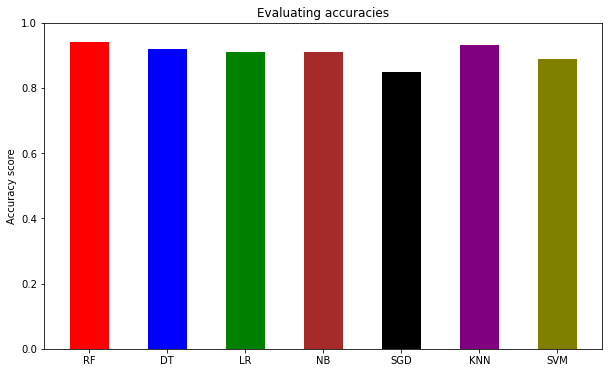

In [42]:
algo = ['RF','DT','LR','NB','SGD','KNN','SVM']
score = [score_rf, score_dt, score_lr, score_nb, score_sgd, score_knn, score_svm]
c = ['Red','Blue','Green', 'Brown', 'Black', 'Purple', 'Olive']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c),
plt.title('Evaluating accuracies')
plt.ylabel('Accuracy score')
plt.ylim(0,1)
plt.show()

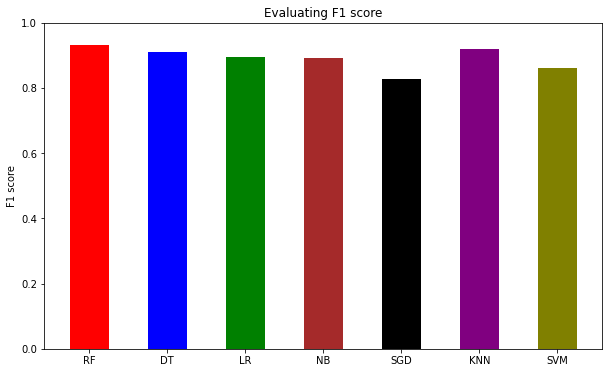

In [43]:
algo = ['RF','DT','LR','NB','SGD','KNN','SVM']
score = [f1_score_rf, f1_score_dt, f1_score_lr, f1_score_nb, f1_score_sgd, f1_score_knn, f1_score_svm]
c = ['Red','Blue','Green', 'Brown', 'Black', 'Purple', 'Olive']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating F1 score')
plt.ylabel('F1 score')
plt.ylim(0,1)
plt.show()

Coparing precision score

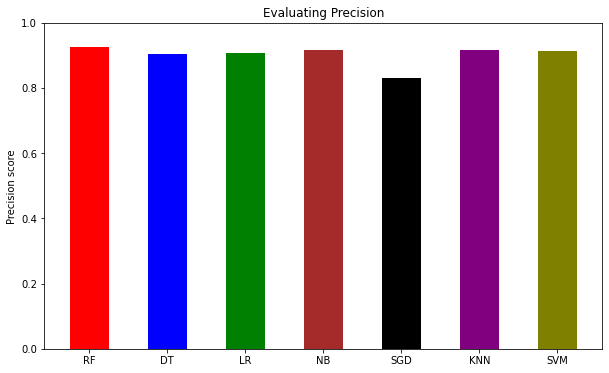

In [44]:
algo = ['RF','DT','LR','NB','SGD','KNN','SVM']
score = [srf,sdt,slr,snb,ssgd,sknn,ssvm]
c = ['Red','Blue','Green', 'Brown', 'Black', 'Purple', 'Olive']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Precision')
plt.ylabel('Precision score')
plt.ylim(0,1)
plt.show()

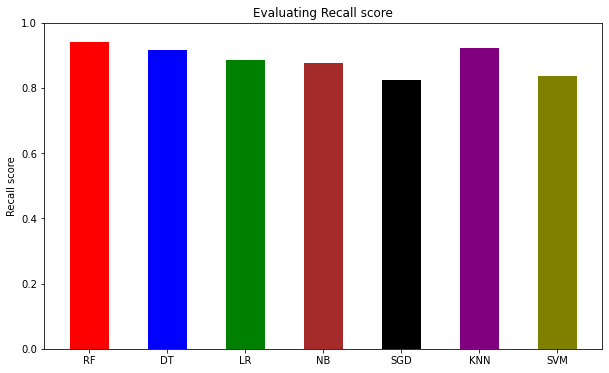

In [45]:
algo = ['RF','DT','LR','NB','SGD','KNN','SVM']
score = [s_rf,s_dt,s_lr,s_nb,s_sgd,s_knn,s_svm]
c = ['Red','Blue','Green', 'Brown', 'Black', 'Purple', 'Olive']
plt.figure(figsize=(10,6))
plt.bar(algo,score,width=0.5, color=c)
plt.title('Evaluating Recall score')
plt.ylabel('Recall score')
plt.ylim(0,1)
plt.show()

# Plotting the performance

In [46]:
from sklearn.metrics import roc_curve, auc

In [47]:
fp1, tp1, thresholds1 = roc_curve(y_test, y_pred_rf[:])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, y_pred_dt[:])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, y_pred_lr[:])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, y_pred_nb[:])
roc_auc_model4 = auc(fp4, tp4)
fp5, tp5, thresholds5 = roc_curve(y_test, y_pred_sgd[:])
roc_auc_model5 = auc(fp5, tp5)
fp6, tp6, thresholds6 = roc_curve(y_test, y_pred_knn[:])
roc_auc_model6 = auc(fp6, tp6)
fp7, tp7, thresholds7 = roc_curve(y_test, y_pred_svm[:])
roc_auc_model7 = auc(fp7, tp7)

print("AUC for Random Forest Model : ",roc_auc_model1)
print("AUC for Decision Tree Model:", roc_auc_model2)
print("AUC for Logistic Regression Model :" ,roc_auc_model3)
print("AUC for Naive Bayes Model :" ,roc_auc_model4)
print("AUC for Stochastic Gradient Descent Model :" ,roc_auc_model5)
print("AUC for K-Nearest Neighbours Model :" ,roc_auc_model6)
print("AUC for Support Vector Machine Model :" ,roc_auc_model7)

AUC for Random Forest Model :  0.9393382352941176
AUC for Decision Tree Model: 0.9163602941176471
AUC for Logistic Regression Model : 0.8841911764705883
AUC for Naive Bayes Model : 0.8759191176470588
AUC for Stochastic Gradient Descent Model : 0.8235294117647058
AUC for K-Nearest Neighbours Model : 0.9237132352941176
AUC for Support Vector Machine Model : 0.8363970588235294


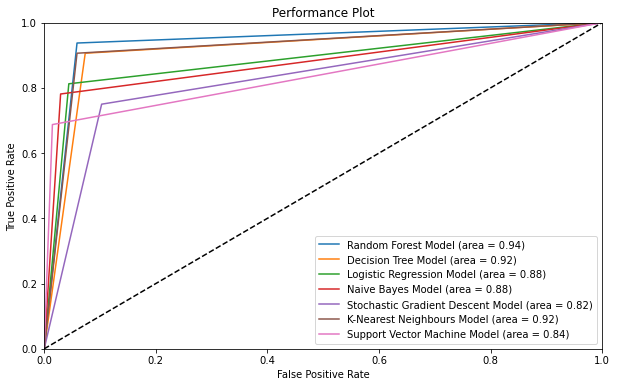

In [48]:
plt.figure(figsize=(10,6))
plt.clf()
plt.plot(fp1, tp1, label='Random Forest Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='Decision Tree Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='Logistic Regression Model (area = %0.2f)' %roc_auc_model3)
plt.plot(fp4, tp4, label='Naive Bayes Model (area = %0.2f)' %roc_auc_model4)
plt.plot(fp5, tp5, label='Stochastic Gradient Descent Model (area = %0.2f)' %roc_auc_model5)
plt.plot(fp6, tp6, label='K-Nearest Neighbours Model (area = %0.2f)' %roc_auc_model6)
plt.plot(fp7, tp7, label='Support Vector Machine Model (area = %0.2f)' %roc_auc_model7)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Performance Plot')
plt.legend(loc="lower right")
plt.show()